In [31]:
!pip install geopandas

  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      proj executable not found. Please set the PROJ_DIR variable. For more information see: https://pyproj4.github.io/pyproj/stable/installation.html
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import streamlit as st

In [23]:
df = pd.read_csv("city_day.csv")

# View first few rows
df.head()

# Shape of the data
print(df.shape)

# Data types and missing values
print(df.info())
print(df.isnull().sum())

(29531, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None
City              0
Date              0
PM2.5          4598
PM10          11140
NO 

In [25]:
df.isnull().sum().sort_values(ascending=False)
df.describe(include='all')

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
count,25812,25812,25812.000000,25812.000000,25812.000000,25812.000000,25812.000000,25812.000000,25812.000000,25812.000000,25812.000000,25812.000000,25812.000000,25812.000000,25812.000000,25812
unique,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Delhi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate
freq,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9895
mean,NaN,2018-07-06 19:59:09.790795264,67.387040,118.042839,17.655874,28.748486,32.201288,23.608415,2.389421,14.471525,34.641450,3.505922,9.362538,3.506157,166.826339,NaN
min,NaN,2015-01-01 00:00:00,0.040000,0.180000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,14.000000,NaN
25%,NaN,2017-07-16 00:00:00,29.600000,71.927500,5.680000,12.010000,13.920000,11.120000,0.590000,5.757500,19.330000,0.310000,1.520000,2.460000,83.000000,NaN
50%,NaN,2018-10-25 00:00:00,50.520000,118.042839,10.055000,22.205000,25.540000,23.608415,0.950000,9.360000,31.725000,1.740000,6.490000,3.506157,122.000000,NaN
75%,NaN,2019-10-06 00:00:00,78.540000,121.132500,19.940000,37.590000,38.252500,24.300000,1.540000,14.942500,45.122500,3.505922,9.362538,3.506157,200.000000,NaN
max,NaN,2020-07-01 00:00:00,949.990000,1000.000000,390.680000,362.210000,382.840000,352.890000,175.810000,187.020000,257.730000,455.030000,454.850000,170.370000,2049.000000,NaN


### Data Cleaning


In [24]:
# Drop rows with too many missing values
df = df.dropna(thresh=10)  # keeps rows with at least 10 non-NA values

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Fill missing numeric values with mean of respective column
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical 'AQI_Bucket' with mode
df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0], inplace=True)

/var/folders/g9/c921yl2d6vxbrkyhq_5bh31c0000gn/T/ipykernel_22722/3265094917.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0], inplace=True)


### ❓ Question:
Which cities in India have the highest average Air Quality Index (AQI), and how do they compare to others?

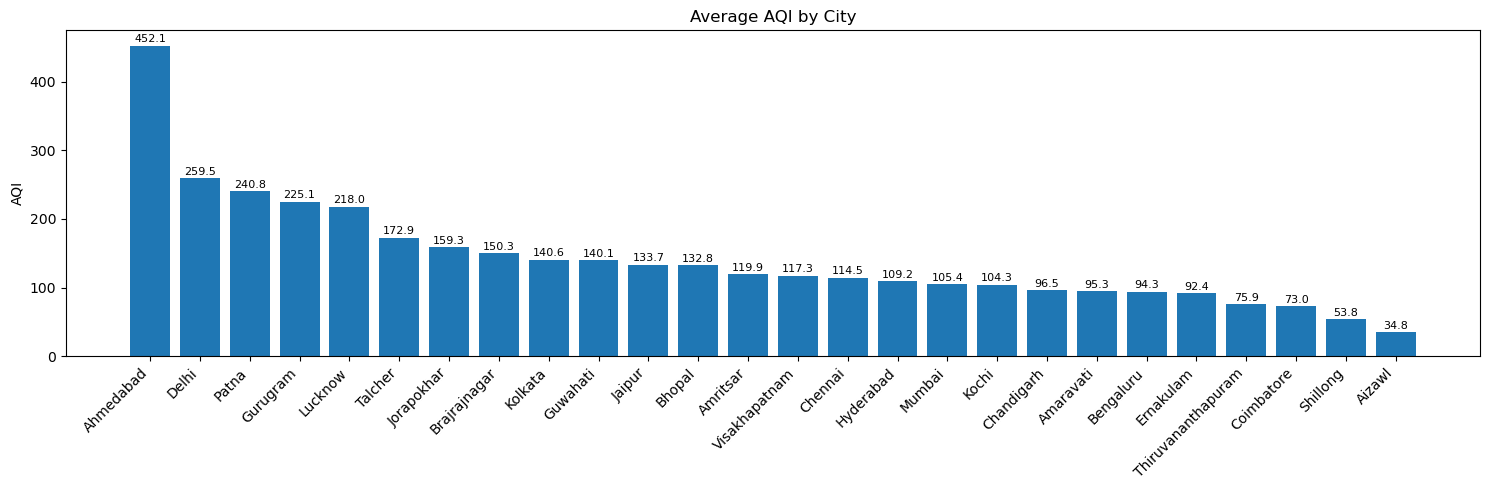

In [8]:
city_aqi = df.groupby("City")['AQI'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 5))
bars = plt.bar(city_aqi.index, city_aqi.values)
plt.title('Average AQI by City')
plt.ylabel('AQI')
plt.xticks(rotation=45, ha='right')

# Adding data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 1), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### 📊 Conclusion: Average AQI by City

1. **Ahmedabad** has the **highest average AQI** (~452), indicating extremely poor air quality.
2. **Delhi, Patna, and Gurugram** follow with very high values, all in the **"very unhealthy"** category.
3. **Aizawl, Shillong, Coimbatore, and Thiruvananthapuram** have **AQI < 100**, indicating good air quality.
4. There is a clear disparity between metro/industrial cities and greener regions.
5. **Urbanization and industrial activity** strongly correlate with higher AQI levels.

💡 **Insight**: High-priority air quality management is needed in top-polluted cities, while preventive care is crucial for clean-air zones.


### ❓ Question:
How has the average AQI level across India changed over the years? Are there any noticeable trends or seasonal patterns?

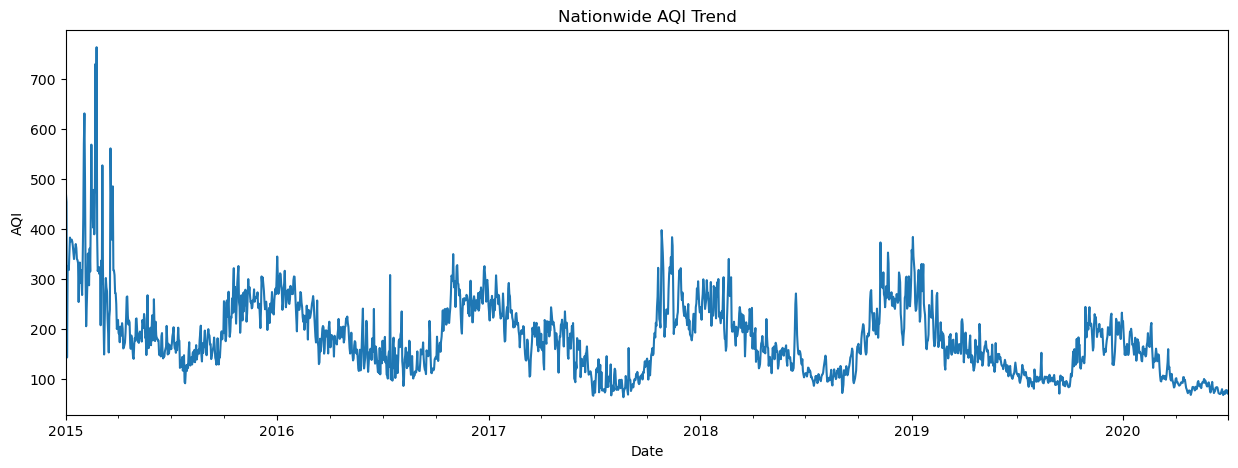

In [9]:
# Overall trend
df['Date'] = pd.to_datetime(df['Date'])
df.groupby('Date')['AQI'].mean().plot(figsize=(15,5), title='Nationwide AQI Trend')
plt.ylabel('AQI')
plt.show()

### ✅ Conclusion:

The nationwide AQI trend from 2015 to 2020 reveals strong **seasonal fluctuations**, with visible spikes around the winter months each year—likely due to weather inversion, crop burning, and festival-related pollution (e.g., Diwali). 

Despite year-to-year variability, there appears to be a **gradual downward trend** in overall AQI levels toward the end of the period, especially during 2020. This drop may partially be attributed to reduced industrial and vehicular activity during the COVID-19 lockdowns. 

The data underscores the importance of targeted pollution control measures during high-risk seasons to improve overall air quality across the country.


### What is the distribution of air quality categories across India?

The AQI Bucket Distribution plot shows the frequency of observations falling into each air quality category (like "Good", "Satisfactory", "Moderate", etc.).


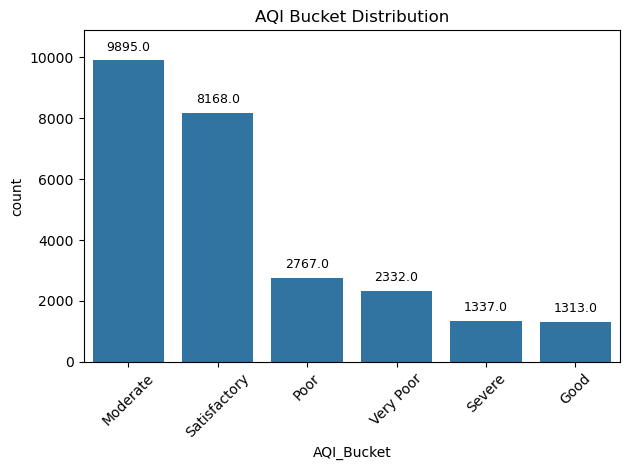

In [13]:
ax = sns.countplot(data=df, x='AQI_Bucket', order=df['AQI_Bucket'].value_counts().index)
plt.xticks(rotation=45)
plt.title('AQI Bucket Distribution')

# Set a higher Y-limit to avoid clipping of labels
max_height = max([p.get_height() for p in ax.patches])
plt.ylim(0, max_height * 1.10)  # add 10% headroom

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

### ✅ Conclusion:
The majority of air quality observations fall under the **"Moderate"** and **"Satisfactory"** categories, with **9,895** and **8,168** records respectively. In contrast, categories representing poor air quality—such as **"Poor"**, **"Very Poor"**, and **"Severe"**—have significantly fewer observations. The **"Good"** category has the lowest count among the healthier categories, suggesting that clean air conditions are relatively rare in the dataset.

Overall, the data indicates that while extreme pollution is less frequent, **clean air is also uncommon**, with most readings clustering in the middle range of air quality.


### 🔍 Question
Which pollutants have the strongest influence on AQI, and how do various air quality parameters correlate with one another?


#### 📊 Correlation Heatmap Analysis
The heatmap below illustrates the Pearson correlation coefficients between different air pollutants and the Air Quality Index (AQI). A higher positive correlation implies that as the pollutant concentration increases, AQI tends to worsen (i.e., increases).

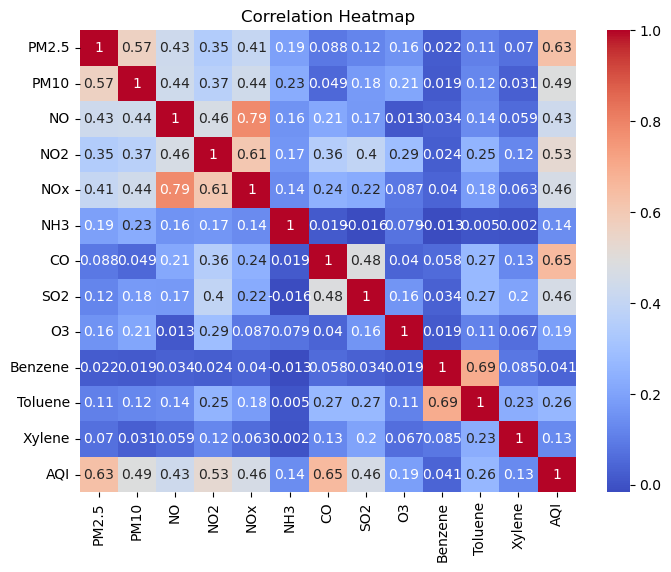

AQI        1.000000
CO         0.653747
PM2.5      0.633293
NO2        0.526999
PM10       0.488716
NOx        0.464034
SO2        0.461254
NO         0.433896
Toluene    0.262831
O3         0.189230
NH3        0.139161
Xylene     0.133983
Benzene    0.040981
Name: AQI, dtype: float64


In [17]:
plt.figure(figsize=(8,6))
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Print correlation with AQI
print(corr['AQI'].sort_values(ascending=False))

###  ✅ Conclusion
From the correlation data:

CO (r = 0.65) shows the strongest positive correlation with AQI.

PM2.5 (r = 0.63) and NO2 (r = 0.53) also have a significant impact on AQI.

Other moderately correlated pollutants include PM10, NOx, SO2, and NO.

Gaseous pollutants like O3, NH3, Xylene, and Benzene show weak correlations with AQI.

This suggests that CO and particulate matter (PM2.5, PM10) are key drivers of poor air quality in the dataset. Efforts to control these pollutants could lead to the most effective improvements in air quality.

### Feature Engineering

In [27]:
# Extracting year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Drop 'Date' since we've extracted features from it
df.drop(columns=['Date'], inplace=True)

# Encode 'AQI_Bucket' if needed for classification tasks later
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['AQI_Bucket_Label'] = le.fit_transform(df['AQI_Bucket'])

In [28]:
# Define features and target
X = df.drop(columns=['City', 'AQI', 'AQI_Bucket', 'AQI_Bucket_Label'])
y = df['AQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8990687686921791
RMSE: 43.447908837806885


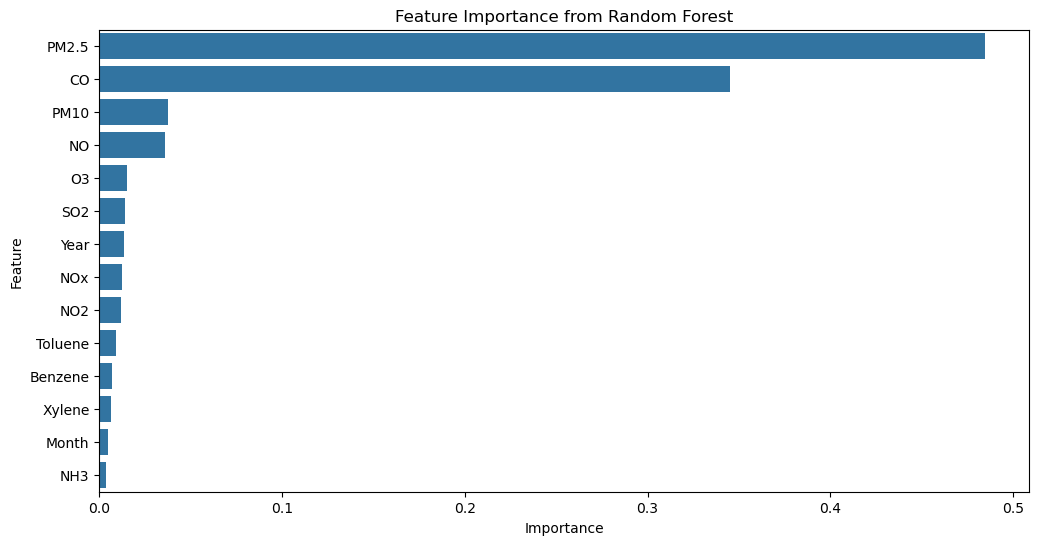

In [34]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance from Random Forest')
plt.show()